In [98]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import re
from wordcloud import WordCloud 


In [99]:
df = pd.read_csv(r"spotify_millsongdata.csv")

In [100]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [101]:
df


,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


In [102]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [103]:
df.shape

(57650, 4)

In [104]:
 top_artists = df['artist'].value_counts().head(10)
 print("\n Top Artists: ")
 print(top_artists)


 Top Artists: 
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Alabama             187
Reba Mcentire       187
Cher                187
Loretta Lynn        187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [105]:
df = df.drop('link', axis= 1).reset_index(drop=True)

In [106]:
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(all_lyrics)

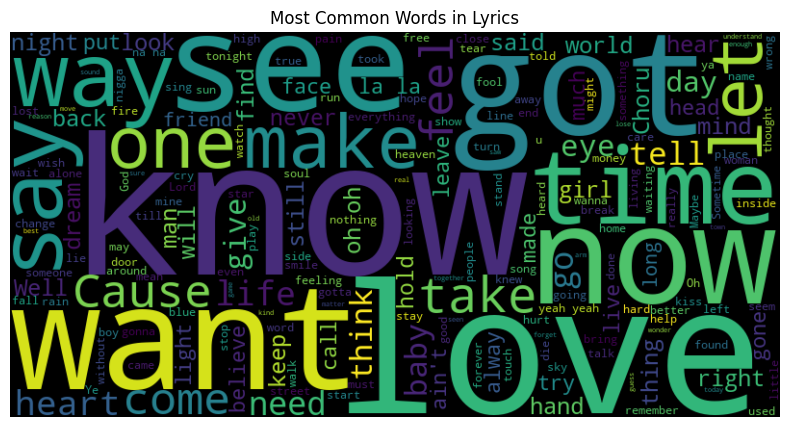

In [107]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

In [108]:
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation and special characters
    text = text.lower()  # convert to lowercase
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [ ]:
df['cleared_text'] = df['text'].apply(preprocess_text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleared_text'])

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn_model = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')  # 6 = 1 (query) + 5 neighbors
nn_model.fit(tfidf_matrix)

,n_neighbors,6
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [ ]:
def recommend_songs(song_name, model=nn_model, df=df, vectorizer=tfidf_vectorizer, top_n=5):
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song Not Found in Dataset", None
    idx = idx[0]

    song_vector = tfidf_matrix[idx]
    distances, indices = model.kneighbors(song_vector, n_neighbors=top_n+1)  # include the song itself
    song_indices = indices[0][1:]  # exclude the query song

    return df[['artist', 'song']].iloc[song_indices], idx


In [ ]:
df['song'][2]

'The Distance'

In [ ]:
print("\n Recommendation for Songs 'Blinded by the Rainbows': " )
recomendations = recommend_songs("Silver Bells")
print(recomendations)


 Recommendation for Songs 'Blinded by the Rainbows': 
               artist                        song
8912             Rush     Force Ten (Phoenix, AZ)
1375     Cyndi Lauper                 Three Ships
3427  Christmas Songs  Give Love On Christmas Day
3005      Erik Santos   All I Want This Christmas
6215            Heart         It's Christmas Time
